In [1590]:
###Import all the required libraries###


import matplotlib.pyplot as plt
%matplotlib inline
import requests
import folium 
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
from geopy.geocoders import Nominatim 

import requests # library to handle requests
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('All Libraries imported.')

Libraries imported.


# Postal Codes and Neighborhoods in Bangalore #

In [1591]:
### Read the .csv file using pandas ###
df_bng = pd.read_csv("data/Bangalore_neighbourhoods.csv")

In [1592]:
df_bng.head()
df_bng.shape

(99, 7)

In [1687]:
df_bng.head()

,Unnamed: 0,Postalcode,Neighborhood,Latitude,Longitude,Population,Housing,Cluster Labels
0,0,560007,Air Force Hospital,12.964027,77.627500,866377,10000000,0
1,1,560024,Anandnagar Bangalore,13.033377,77.589523,474289,5000000,0
2,2,560045,Arabic College,13.030013,77.620872,527874,4000000,1
3,3,560047,Austin Town,12.961274,77.615294,730999,5000000,0
4,4,560043,Banaswadi,13.014162,77.651854,981362,6000000,0


In [1593]:
bangalore_latitude = df_bng['Latitude'].mean()
bangalore_longitude = df_bng['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",bangalore_latitude,bangalore_longitude)

Latitude and Longitude of Bangalore are :  12.971641813636362 77.60553396101011


# Bangalore Neighborhoods in Folium Map

In [1594]:
# create map of Toronto using latitude and longitude values
map_bng = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=10)

# add markers to map
for lat, lng, nei in zip(df_bng['Latitude'], df_bng['Longitude'], df_bng['Neighborhood']):
    
    label = '{}'.format(nei)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bng)  
    
map_bng

In [1596]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

address = ['Bangalore,Karnataka']
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print ("Bangalore Latitude and Longitude -->", latitude, longitude)

Bangalore Latitude and Longitude --> 12.9791198 77.5912997


# Foursquare API #

In [1597]:
CLIENT_ID = '2I1BKJFLBSXDP30KSPUNNJKHTU5AYCDZCHRORGCWZ3GWHLMM'
CLIENT_SECRET = 'M4DBTJZEKSNRTBSDHBS2FIABUECFYAJBPDU5VDQFLM1YTYZ5'
VERSION = '20200619'
LIMIT = 150

In [1598]:
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)

In [1599]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5eec8e8c02a1720022735ec5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bangalore',
  'headerFullLocation': 'Bangalore',
  'headerLocationGranularity': 'city',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 12.985419806300007,
    'lng': 77.59775280759838},
   'sw': {'lat': 12.972819793699992, 'lng': 77.5848465924016}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bbc4513e45295217db855a4',
       'name': 'Cubbon Park',
       'location': {'address': 'M G Road',
        'lat': 12.977042175203783,
        'lng': 77.59527683258057,
        'labeledLatLngs': [{'label': 'display',
          'lat': 12.977042175203783,
          'lng

In [1600]:
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.lat',
       'venue.location.lng', 'venue.location.labeledLatLngs',
       'venue.location.distance', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.postalCode'],
      dtype='object')

In [1601]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# FourSquare API Calls and its usage #

In [1602]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Cubbon Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",12.977042,77.595277
1,Vidhana Soudha,"[{'id': '4bf58dd8d48988d12a941735', 'name': 'C...",12.979027,77.591881
2,Chevron Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",12.983619,77.594379
3,Oriental Spice,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",12.983893,77.593591
4,Jawaharlal Nehru Planetarium,"[{'id': '4bf58dd8d48988d192941735', 'name': 'P...",12.984570,77.590163


In [1603]:
nearby_venues.head(9)

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,Cubbon Park,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",12.977042,77.595277
1,Vidhana Soudha,"[{'id': '4bf58dd8d48988d12a941735', 'name': 'C...",12.979027,77.591881
2,Chevron Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",12.983619,77.594379
3,Oriental Spice,"[{'id': '4bf58dd8d48988d145941735', 'name': 'C...",12.983893,77.593591
4,Jawaharlal Nehru Planetarium,"[{'id': '4bf58dd8d48988d192941735', 'name': 'P...",12.984570,77.590163
5,Sreeraj Lassi Bar,"[{'id': '4bf58dd8d48988d112941735', 'name': 'J...",12.983183,77.587633
6,Atria Hotel,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",12.980227,77.586067
7,KSLTA Tennis stadium,"[{'id': '4e39a891bd410d7aed40cbc2', 'name': 'T...",12.975094,77.594439
8,Nisarga Garden Restaurant,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",12.983332,77.594431


In [1604]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cubbon Park,Park,12.977042,77.595277
1,Vidhana Soudha,Capitol Building,12.979027,77.591881
2,Chevron Hotel,Hotel,12.983619,77.594379
3,Oriental Spice,Chinese Restaurant,12.983893,77.593591
4,Jawaharlal Nehru Planetarium,Planetarium,12.984570,77.590163


In [1605]:
nearby_venues.head(10)

,name,categories,lat,lng
0,Cubbon Park,Park,12.977042,77.595277
1,Vidhana Soudha,Capitol Building,12.979027,77.591881
2,Chevron Hotel,Hotel,12.983619,77.594379
3,Oriental Spice,Chinese Restaurant,12.983893,77.593591
4,Jawaharlal Nehru Planetarium,Planetarium,12.984570,77.590163
5,Sreeraj Lassi Bar,Juice Bar,12.983183,77.587633
6,Atria Hotel,Hotel,12.980227,77.586067
7,KSLTA Tennis stadium,Tennis Stadium,12.975094,77.594439
8,Nisarga Garden Restaurant,Indian Restaurant,12.983332,77.594431
9,Karnataka museum,Museum,12.974540,77.595608


In [1606]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
        CLIENT_SECRET, 
            VERSION,
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [1609]:
bangalore_venues = getNearbyVenues(names=df['Neighborhood'],latitudes=df['Neighborhood Latitude'],longitudes=df['Neighborhood Longitude'])

In [1610]:
bangalore_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adugodi,7,7,7,7,7,7
Air Force Hospital,3,3,3,3,3,3
Anandnagar Bangalore,10,10,10,10,10,10
Anjanapura,2,2,2,2,2,2
Arabic College,3,3,3,3,3,3


In [1611]:
print('There are {} uniques categories.'.format(len(bangalore_venues['Venue Category'].unique())))

There are 194 uniques categories.


# One hot encoding #

In [1612]:
bangalore_onehot = pd.get_dummies(bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangalore_onehot['Neighborhood'] = bangalore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bangalore_onehot.columns[-1]] + list(bangalore_onehot.columns[:-1])
bangalore_onehot = bangalore_onehot[fixed_columns]
bangalore_onehot.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Service,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Doner Restaurant,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Health Food Store,Historic Site,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lighting Store,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Nightlife,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taxi Stand,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Trail,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store
0,Air Force Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Air Force Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Air Force Hospital,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1613]:
bangalore_onehot.shape

(1627, 195)

In [1614]:
bangalore_grouped = bangalore_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_grouped.head()

,Neighborhood,ATM,Accessories Store,Airport,Airport Service,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Bar,Basketball Court,Bed & Breakfast,Beer Garden,Bistro,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Candy Store,Capitol Building,Caribbean Restaurant,Casino,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Dog Run,Doner Restaurant,Donut Shop,Duty-free Shop,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,General Entertainment,German Restaurant,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Health Food Store,Historic Site,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lake,Light Rail Station,Lighting Store,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Museum,Music Store,Music Venue,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Optical Shop,Other Nightlife,Outdoor Supply Store,Outlet Store,Paella Restaurant,Paintball Field,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South Indian Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Steakhouse,Supermarket,Sushi Restaurant,Swiss Restaurant,Taxi Stand,Tea Room,Tennis Stadium,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Plaza,Toy / Game Store,Trail,Train Station,Travel & Transport,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Shop,Women's Store
0,Adugodi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.142857,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.285714,0.0,0.0,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Air Force Hospital,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [1615]:
bangalore_grouped.shape

(99, 195)

In [1616]:
num_top_venues = 5
for hood in bangalore_grouped['Neighborhood'][:3]:
    print("----"+hood+"----")
    temp = bangalore_grouped[bangalore_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adugodi----
            venue  freq
0      Playground  0.29
1  Ice Cream Shop  0.14
2     Bus Station  0.14
3            Café  0.14
4      Restaurant  0.14


----Air Force Hospital----
          venue  freq
0   Pizza Place  0.33
1     Multiplex  0.33
2        Casino  0.33
3           ATM  0.00
4  Noodle House  0.00


----Anandnagar Bangalore----
               venue  freq
0  Indian Restaurant   0.2
1           Pharmacy   0.1
2              Hotel   0.1
3               Park   0.1
4   Department Store   0.1




In [1617]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [1618]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bangalore_grouped['Neighborhood']

for ind in np.arange(bangalore_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bangalore_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adugodi,Playground,Ice Cream Shop,Electronics Store,Bus Station,Café,Restaurant,Women's Store,Dog Run,Fast Food Restaurant,Farmers Market
1,Air Force Hospital,Pizza Place,Multiplex,Casino,Women's Store,Dog Run,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
2,Anandnagar Bangalore,Indian Restaurant,Hotel,Park,Pharmacy,Market,Department Store,Motorcycle Shop,Café,Garden Center,Women's Store
3,Anjanapura,ATM,Pool,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant,Duty-free Shop,Donut Shop
4,Arabic College,Pizza Place,Optical Shop,Juice Bar,Women's Store,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant


# Use Elbow method to calculate the no.of clusters using k-means clustering #

In [1619]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

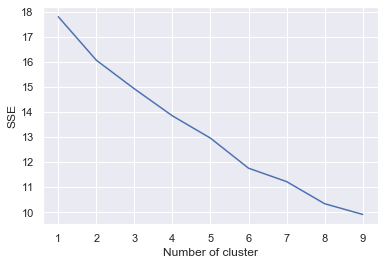

In [1620]:
bangalore_clustering = bangalore_grouped.drop('Neighborhood', 1)
sse={}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=500).fit(bangalore_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [1621]:
kclusters = 2

bangalore_clustering = bangalore_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangalore_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [1622]:
bangalore_merged = df_bng

# add clustering labels
bangalore_merged['Cluster Labels'] = kmeans.labels_

# merge chicago_grouped with chicago_data to add latitude/longitude for each neighborhood
bangalore_merged = bangalore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bangalore_merged.head()# check the last columns!

,Unnamed: 0,Postalcode,Neighborhood,Latitude,Longitude,Population,Housing,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,560007,Air Force Hospital,12.964027,77.627500,866377,10000000,0,Pizza Place,Multiplex,Casino,Women's Store,Dog Run,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
1,1,560024,Anandnagar Bangalore,13.033377,77.589523,474289,5000000,0,Indian Restaurant,Hotel,Park,Pharmacy,Market,Department Store,Motorcycle Shop,Café,Garden Center,Women's Store
2,2,560045,Arabic College,13.030013,77.620872,527874,4000000,1,Pizza Place,Optical Shop,Juice Bar,Women's Store,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
3,3,560047,Austin Town,12.961274,77.615294,730999,5000000,0,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Café,Donut Shop,Women's Store,Doner Restaurant,Flower Shop,Flea Market,Fast Food Restaurant
4,4,560043,Banaswadi,13.014162,77.651854,981362,6000000,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Café,Department Store,Bus Station,Bakery,BBQ Joint,Women's Store,Duty-free Shop,Flower Shop


# Map of Clusters #

In [1623]:
map_clusters = folium.Map(location=[bangalore_latitude, bangalore_longitude], zoom_start=11)
import matplotlib.colors as colors
# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map
markers_colors = []
for lat, lon, nei , cluster in zip(bangalore_merged['Latitude'], bangalore_merged['Longitude'], bangalore_merged['Neighborhood'], bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#ff0000']


# Cluster #1 #

In [1624]:
df_1 = bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 0, bangalore_merged.columns[[2] + list(range(5, bangalore_merged.shape[1]))]]
df_1

,Neighborhood,Population,Housing,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Air Force Hospital,866377,10000000,0,Pizza Place,Multiplex,Casino,Women's Store,Dog Run,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
1,Anandnagar Bangalore,474289,5000000,0,Indian Restaurant,Hotel,Park,Pharmacy,Market,Department Store,Motorcycle Shop,Café,Garden Center,Women's Store
3,Austin Town,730999,5000000,0,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Café,Donut Shop,Women's Store,Doner Restaurant,Flower Shop,Flea Market,Fast Food Restaurant
4,Banaswadi,981362,6000000,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Café,Department Store,Bus Station,Bakery,BBQ Joint,Women's Store,Duty-free Shop,Flower Shop
6,Bellandur,396862,10000000,0,Hotel,Museum,Chinese Restaurant,Park,Indian Restaurant,Tennis Stadium,Capitol Building,Juice Bar,Planetarium,Dog Run
8,Bhattarahalli,656726,4000000,0,Hotel,Ice Cream Shop,Indian Restaurant,Café,Dog Run,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store
11,CMP Centre & School,122714,10000000,0,Hotel,BBQ Joint,Sporting Goods Shop,Tea Room,Market,Halal Restaurant,Dog Run,Flower Shop,Flea Market,Fast Food Restaurant
12,Doddanekkundi,330409,7600000,0,Indian Restaurant,Mediterranean Restaurant,Fried Chicken Joint,Coffee Shop,Clothing Store,Sandwich Place,Sports Bar,Motorcycle Shop,Movie Theater,Restaurant
13,Domlur,351936,10000000,0,Café,Italian Restaurant,Indian Restaurant,Sports Bar,Food & Drink Shop,Nightclub,Lighting Store,Karnataka Restaurant,Pizza Place,Liquor Store
15,EPIP,249182,4000000,0,Restaurant,Coffee Shop,Breakfast Spot,Italian Restaurant,Fried Chicken Joint,Café,Maharashtrian Restaurant,Salad Place,Donut Shop,Indian Restaurant


# Cluster #2 #

In [1681]:
df_2=bangalore_merged.loc[bangalore_merged['Cluster Labels'] == 1,bangalore_merged.columns[[2] + list(range(5, bangalore_merged.shape[1]))]]
df_2

,Neighborhood,Population,Housing,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Arabic College,527874,4000000,1,Pizza Place,Optical Shop,Juice Bar,Women's Store,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
5,Bangalore International Airport,662625,3500000,1,Airport Service,Coffee Shop,Indian Restaurant,Café,Sandwich Place,Italian Restaurant,Doner Restaurant,Bar,Pizza Place,Burrito Place
7,Benson Town,77836,5000000,1,BBQ Joint,Vegetarian / Vegan Restaurant,Department Store,Bakery,Café,Women's Store,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
9,Byatarayanapura,942711,5000000,1,Indian Restaurant,Bubble Tea Shop,Gourmet Shop,Pizza Place,Department Store,Ice Cream Shop,Brewery,Wine Shop,Liquor Store,Flower Shop
10,C.V.Raman Nagar,208094,6000000,1,Indian Restaurant,Coffee Shop,Café,Restaurant,Pizza Place,Smoke Shop,Deli / Bodega,Cupcake Shop,Flea Market,Fast Food Restaurant
14,Dr. Ambedkar Veedhi,905568,5000000,1,Hotel,Indian Restaurant,Capitol Building,Tennis Stadium,Creperie,Cupcake Shop,Flower Shop,Flea Market,Fast Food Restaurant,Farmers Market
19,Kothanur,822101,6000000,1,Bakery,Coffee Shop,North Indian Restaurant,Pizza Place,Italian Restaurant,Sandwich Place,Café,Restaurant,Dog Run,Farmers Market
20,"Krishnarajapuram R S,Krishnarajapuram",679059,5000000,1,Indian Restaurant,Fast Food Restaurant,Intersection,Liquor Store,Women's Store,Dog Run,Flower Shop,Flea Market,Farmers Market,Electronics Store
21,Kundalahalli,730628,7600000,1,Indian Restaurant,Fast Food Restaurant,Hotel,Bakery,Department Store,Dessert Shop,Cafeteria,Salon / Barbershop,Food,Food Court
23,Mahadevapura,468662,8000000,1,Clothing Store,Coffee Shop,Fast Food Restaurant,French Restaurant,Café,Donut Shop,American Restaurant,Shopping Mall,Multiplex,Italian Restaurant


In [1665]:
clusters_neighborhood=pd.DataFrame({"Cluster1":df_1["Neighborhood"],
                      "Cluster2":df_2["Neighborhood"]
                      })

In [1666]:
clusters_neighborhood = clusters_neighborhood.replace(np.nan, '', regex=True)

In [1667]:
clusters_neighborhood

,Cluster1,Cluster2
0,Air Force Hospital,
1,Anandnagar Bangalore,
2,,Arabic College
3,Austin Town,
4,Banaswadi,
5,,Bangalore International Airport
6,Bellandur,
7,,Benson Town
8,Bhattarahalli,
9,,Byatarayanapura


In [1629]:
bangalore_new=bangalore_merged.set_index("Neighborhood",drop=True)
bangalore_new.head()

,Unnamed: 0,Postalcode,Latitude,Longitude,Population,Housing,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,
Air Force Hospital,0,560007,12.964027,77.627500,866377,10000000,0,Pizza Place,Multiplex,Casino,Women's Store,Dog Run,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
Anandnagar Bangalore,1,560024,13.033377,77.589523,474289,5000000,0,Indian Restaurant,Hotel,Park,Pharmacy,Market,Department Store,Motorcycle Shop,Café,Garden Center,Women's Store
Arabic College,2,560045,13.030013,77.620872,527874,4000000,1,Pizza Place,Optical Shop,Juice Bar,Women's Store,Diner,Flea Market,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant
Austin Town,3,560047,12.961274,77.615294,730999,5000000,0,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Café,Donut Shop,Women's Store,Doner Restaurant,Flower Shop,Flea Market,Fast Food Restaurant
Banaswadi,4,560043,13.014162,77.651854,981362,6000000,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Café,Department Store,Bus Station,Bakery,BBQ Joint,Women's Store,Duty-free Shop,Flower Shop


In [1630]:
bangalore_population = bangalore_merged[["Neighborhood", "Population"]]

In [1631]:
bangalore_population

,Neighborhood,Population
0,Air Force Hospital,866377
1,Anandnagar Bangalore,474289
2,Arabic College,527874
3,Austin Town,730999
4,Banaswadi,981362
5,Bangalore International Airport,662625
6,Bellandur,396862
7,Benson Town,77836
8,Bhattarahalli,656726
9,Byatarayanapura,942711


In [1632]:
bangalore_population.set_index("Neighborhood")

In [1656]:
bangalore_population.head()

,Neighborhood,Population
0,Air Force Hospital,866377
1,Anandnagar Bangalore,474289
2,Arabic College,527874
3,Austin Town,730999
4,Banaswadi,981362


# Choosing one neighborhood from Bangalore South, North, West and East #

In [1657]:
compare_venues = bangalore_new.loc[["Banashankari III Stage","Malleswaram,Malleswaram West","Rajajinagar","Indiranagar Bangalore"]].T

In [1658]:
compare_venues

Neighborhood,Banashankari III Stage,"Malleswaram,Malleswaram West",Rajajinagar,Indiranagar Bangalore
Unnamed: 0,46,91,97,17
Postalcode,560085,560055,560010,560038
Latitude,12.9327,13.0163,12.9882,12.9733
Longitude,77.5463,77.5587,77.5549,77.6405
Population,138760,737166,901659,83029
Housing,12500000,22500000,20000000,20000000
Cluster Labels,0,1,0,0
1st Most Common Venue,Hotel,Italian Restaurant,Indian Restaurant,Indian Restaurant
2nd Most Common Venue,Pizza Place,Coffee Shop,Bakery,Pub
3rd Most Common Venue,Motorcycle Shop,Bowling Alley,Café,Café


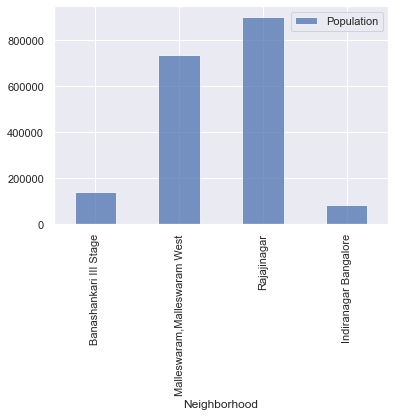

In [1673]:
pop_compare=bangalore_population_1.loc[["Banashankari III Stage","Malleswaram,Malleswaram West","Rajajinagar","Indiranagar Bangalore"]]
pop_compare.plot(kind='bar',alpha=0.75)
plt.show()

In [1674]:
bangalore_housing = bangalore_merged[["Neighborhood", "Housing"]]

In [1675]:
bangalore_housing

,Neighborhood,Housing
0,Air Force Hospital,10000000
1,Anandnagar Bangalore,5000000
2,Arabic College,4000000
3,Austin Town,5000000
4,Banaswadi,6000000
5,Bangalore International Airport,3500000
6,Bellandur,10000000
7,Benson Town,5000000
8,Bhattarahalli,4000000
9,Byatarayanapura,5000000


In [1676]:
bangalore_housing.set_index("Neighborhood")
bangalore_housing.head()

,Neighborhood,Housing
0,Air Force Hospital,10000000
1,Anandnagar Bangalore,5000000
2,Arabic College,4000000
3,Austin Town,5000000
4,Banaswadi,6000000


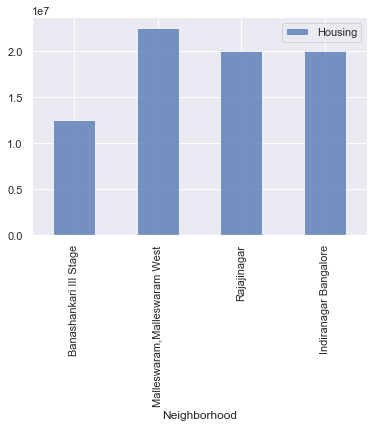

In [1686]:
house_compare=bangalore_housing_1.loc[["Banashankari III Stage","Malleswaram,Malleswaram West","Rajajinagar","Indiranagar Bangalore"]]
house_compare.plot(kind='bar',alpha=0.75)
plt.show()

# Conclusion #

# This analysis concludes that Banashankari III Stage, Bangalore is a better place to live than other 3 places in terms of population, Housing prices, kind of amenities available in the neighborhood etc.